In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("/Users/gabrieltaylor/Downloads/Commute-data.csv")

In [5]:
data

,Commute,Departure,Temp,Precip Chance,Precip,Season,Accident,Police
0,24.283333,9.250000,31.5,48.0,No,Winter,No,1
1,21.433333,13.183333,32.5,40.7,No,Winter,No,1
2,31.483333,6.683333,19.3,84.6,Yes,Winter,No,1
3,23.650000,14.183333,35.0,66.7,No,Winter,No,0
4,26.633333,12.433333,29.7,58.8,Yes,Winter,No,1
...,...,...,...,...,...,...,...,...
95,28.666667,9.016667,29.6,96.0,Yes,Fall,No,1
96,25.066667,14.133333,27.5,63.0,Yes,Fall,No,1
97,25.700000,11.166667,30.2,89.7,Yes,Fall,No,1
98,25.266667,14.733333,20.9,97.2,Yes,Fall,No,1


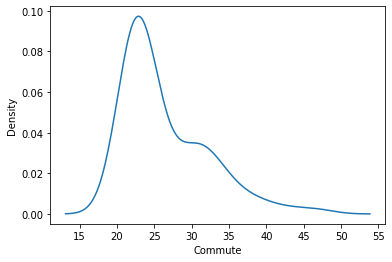

In [6]:
sns.kdeplot('Commute', data = data)

## Ridge Regression

In [12]:
ridge_df = pd.get_dummies(data.drop('Season', axis = 1), drop_first = True)

In [13]:
from sklearn.linear_model import Ridge

In [21]:
X = np.array(ridge_df.drop('Commute', axis = 1))
y = np.array(ridge_df['Commute']).reshape(-1, 1)
lm = Ridge(alpha = 0.01, normalize = True)
lm.fit(X, y)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [22]:
lm.coef_

array([[-0.58289886, -0.01097352,  0.0202754 ,  0.09762257,  3.51880713,
         9.7360515 ]])

## LASSO Regression

In [25]:
lasso_df = pd.get_dummies(data.drop('Season', axis = 1), drop_first = True)

In [27]:
from sklearn.linear_model import Lasso

In [28]:
X = np.array(lasso_df.drop('Commute', axis = 1))
y = np.array(lasso_df['Commute']).reshape(-1, 1)
lm = Lasso(alpha = 0.01, normalize = True)
lm.fit(X, y)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [29]:
lm.coef_

array([-5.32208874e-01, -7.70805080e-03,  1.96200218e-02,  0.00000000e+00,
        3.44216944e+00,  9.85330219e+00])

## Logistic Regression By Hand

$$\hat \beta ^{(m)} = (X^TW^{m - 1}X)^{-1}X^TW^{m - 1}z^{m - 1}$$

$$w_i = \frac{1}{Var[Y_i] * g'(u_i)^2}$$

$$z_i = g(u_i) + (y_i - u_i)g'(u_i)$$

In [13]:
log_df = data[['Commute', 'Departure', 'Temp']]
log_df.loc[:, 'Commute'] = data.loc[:, 'Commute'].apply(lambda x: 1 if x > 24 else 0)

In [46]:
X = np.hstack((np.ones(100).reshape(-1, 1), 
              np.array(log_df.drop('Commute', 1))))
y = np.array(log_df['Commute']).reshape(-1, 1)

In [36]:
inv_logit = lambda x: np.exp(x) / (1 + np.exp(x))

In [37]:
log_odds_prime = lambda x: 1 / (x - x ** 2)

In [86]:
W = np.diag(np.ones(100))

In [96]:
counter = 0
tol = 1
betas = {0: beta0}


while tol > 1e-4 and counter < 100:
    counter += 1
    
    XTWX = np.dot(np.dot(X.transpose(), W), X)
    XTWX_inv = np.linalg.inv(XTWX)
    XTWz = np.dot(np.dot(X.transpose(), W), y)
    cur_betas = np.dot(XTWX_inv, XTWz)
    
    betas[counter] = cur_betas
    
    np.fill_diagonal(W, 1 / abs(y - np.dot(X, cur_betas)))
    
    tol = abs(betas[counter] - betas[counter - 1]).sum()

In [99]:
cur_betas

array([[ 1.59107922],
       [-0.01051171],
       [-0.02087111]])

In [100]:
from sklearn.linear_model import LogisticRegression

In [107]:
clf = LogisticRegression(random_state=0).fit(X, y.flatten())

In [110]:
clf.coef_

array([[-2.07202751e-07, -1.65554672e-01, -6.01526927e-02]])